In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('iris-data.csv')
df

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.dtypes

sepal_length_cm    float64
sepal_width_cm     float64
petal_length_cm    float64
petal_width_cm     float64
class               object
dtype: object

In [6]:
df.isna().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

In [7]:
np.mean(df.loc[lambda iris: iris['class'] =='Iris-setosa'])

C:\Users\vitoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\vitoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


sepal_length_cm    5.020408
sepal_width_cm     3.410204
petal_length_cm    1.459184
petal_width_cm     0.250000
dtype: float64

In [8]:
df.loc[(df['class'] == 'Iris-setosa') & (df['petal_width_cm'].isna())] = 0.25
df.isna().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     0
class              0
dtype: int64

In [9]:
df.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.489627,2.953000,3.717000,1.203667
std,1.629015,0.660746,1.831179,0.763252
min,0.055000,0.250000,0.250000,0.100000
25%,5.100000,2.800000,1.525000,0.300000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:>

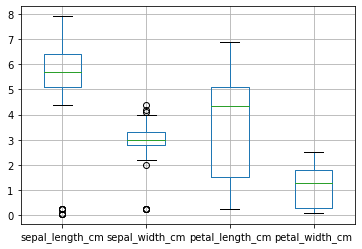

In [10]:
df.boxplot()

In [11]:
stats = df.describe().transpose()
stats['IQR'] = stats['75%'] - stats['25%']
stats

,count,mean,std,min,25%,50%,75%,max,IQR
sepal_length_cm,150.0,5.489627,1.629015,0.055,5.100,5.70,6.4,7.9,1.300
sepal_width_cm,150.0,2.953000,0.660746,0.250,2.800,3.00,3.3,4.4,0.500
petal_length_cm,150.0,3.717000,1.831179,0.250,1.525,4.35,5.1,6.9,3.575
petal_width_cm,150.0,1.203667,0.763252,0.100,0.300,1.30,1.8,2.5,1.500


In [12]:
outliers = pd.DataFrame(columns=df.columns)
 
for col in stats.index:
    iqr = stats.at[col,'IQR']
    cutoff = iqr * 1.5
    lower = stats.at[col,'25%'] - cutoff
    upper = stats.at[col,'75%'] + cutoff
    results = df[(df[col] < lower) | 
                   (df[col] > upper)].copy()
    results['Outlier'] = col
    outliers = outliers.append(results)
    print(outliers)

   sepal_length_cm sepal_width_cm petal_length_cm petal_width_cm  \
7             0.25           0.25            0.25           0.25   
8             0.25           0.25            0.25           0.25   
9             0.25           0.25            0.25           0.25   
10            0.25           0.25            0.25           0.25   
11            0.25           0.25            0.25           0.25   
77           0.067            3.0             5.0            1.7   
78            0.06            2.9             4.5            1.5   
79           0.057            2.6             3.5            1.0   
80           0.055            2.4             3.8            1.1   
81           0.055            2.4             3.7            1.0   

              class          Outlier  
7              0.25  sepal_length_cm  
8              0.25  sepal_length_cm  
9              0.25  sepal_length_cm  
10             0.25  sepal_length_cm  
11             0.25  sepal_length_cm  
77  Iris-versicol

C:\Users\vitoc\AppData\Local\Temp\ipykernel_8560\322717072.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append(results)
C:\Users\vitoc\AppData\Local\Temp\ipykernel_8560\322717072.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append(results)
C:\Users\vitoc\AppData\Local\Temp\ipykernel_8560\322717072.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append(results)
C:\Users\vitoc\AppData\Local\Temp\ipykernel_8560\322717072.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append(results)


In [13]:
iris_fixed=df.drop(index=outliers.index)
iris_fixed

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [14]:
iris_fixed.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,136.000000,136.000000,136.000000,136.000000
mean,5.886029,3.041912,3.881618,1.259559
std,0.811599,0.392816,1.760227,0.762489
min,4.400000,2.200000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.375000
50%,5.800000,3.000000,4.500000,1.400000
75%,6.400000,3.300000,5.125000,1.825000
max,7.900000,4.000000,6.900000,2.500000


In [15]:
iris_fixed.to_csv('iris_fixed.csv')